<a href="https://colab.research.google.com/github/DariuszN/Perceptron/blob/master/CD_2019_perceptron_Dariusz_Nowak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pecteptron 
## Co piszczy w sieciach neuronowych 
### Problem liniowego klasyfikatora binarnego. Czyli co to jest: 'Pies' czy 'Kot' ?


# Import bibliotek

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Prametry rozmiaru obrazka.
plt.rcParams['figure.figsize'] = (15.0, 8.0)

## Liniowy algorytm perceptronowy

Algorytm liniowego perceptronu może być wykorzystywany do klasyfikowania punktów danych zgodnie z wybranymi wcześniej cechami. 

Chodzi o to, aby znaleźć krzywą (lub hiperpłaszczyznę), która oddziela punkty o różnych cechach. Po uzyskaniu krzywej możemy na jej podstawie zdecydować, czy przyszłe punkty będą miały cechę A lub B na podstawie ich położenia względem krzywej (powyżej lub poniżej).

Poniżej generuję zbiór punktów, a następnie rysuję je zgodnie z położeniem względem prostej. Jeśli punkty znajdują się powyżej linii, są niebieskie, jeśli znajdują się poniżej, żółte.

In [0]:
# Generowanie garstki punktów
N = 100
x_n = np.random.rand(N,2)

In [0]:
x = np.linspace(0,1);

In [0]:
# Parametry prostej 
a = np.random.rand()
b = np.random.rand()
f = lambda x : a*x + b

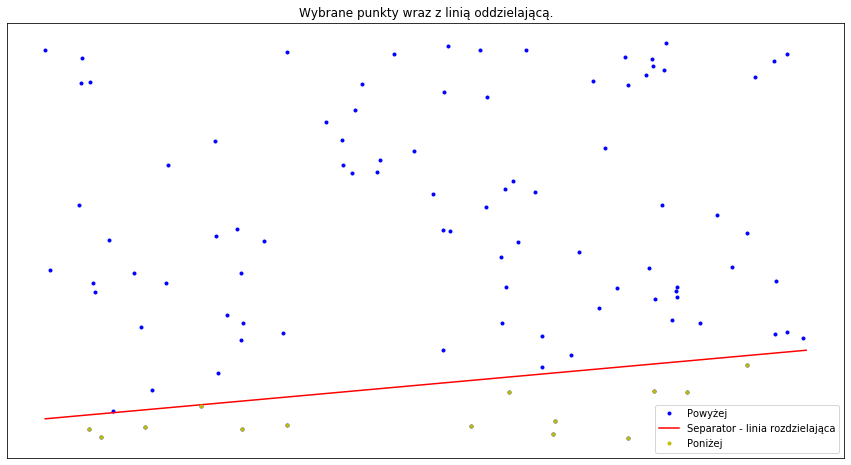

In [0]:
fig = plt.figure()
figa = plt.gca()
plt.plot(x_n[:,0],x_n[:,1],'b.')
plt.plot(x,f(x),'r-')

# Liniowo rozdzielamy punkty 
y_n = np.zeros([N,1]);

for i in range(N):
    if(f(x_n[i,0])>x_n[i,1]):
        # Punkty poniżej lini 
        y_n[i] = 1;
        plt.plot(x_n[i,0],x_n[i,1],'y.')
    else:
        # Punkty powyżej lini 
        y_n[i] = -1;

plt.legend(['Powyżej', 'Separator - linia rozdzielająca', 'Poniżej'],loc=0)
plt.title('Wybrane punkty wraz z linią oddzielającą.')
figa.axes.get_xaxis().set_visible(False)
figa.axes.get_yaxis().set_visible(False)

Krzywa w naturalny sposób dzieli przestrzeń na dwa regiony, jeden z punktów zielonych i jeden z punktów czerwonych. Tak więc, jeśli dodamy nowy punkt, mogę przypisać mu kolor w oparciu o położenie względem krzywej. To jest proste. (kot czy pies)

To, co nie jest takie proste, to znalezienie "krzywej" z uwzględnieniem punktów. Jeśli jednak punkty można rozdzielić liniowo, tj. jeśli istnieje linia, która wykonuje zadanie, mogę po prostu przesunąć linię, aż dojdę do właściwej pozycji. To właśnie robi algorytm liniowego perceptronu.

# Implementacja ALGORYTMU

In [0]:
def perceptron(x_n, y_n, MaxSteps=1000, wy=np.zeros(3)):
    '''
        Bardzo prosta implementacja algorytmu perceptronowego dla danych dwuwymiarowych
        
        Punkty (x, y) z R^2 y w {0,1}, algorytm uczenia się perceptronu szuka najlepszej
        lini oddzielającej punkty danych zgodnie z klasami różnic zdefiniowanymi w 'y'.
        
        Wejście:
            x_n: Punkty danych, wektor Nx2.
            y_n: Klasyfikacja poprzednich punktów danych, wektor Nx1.
            MaxSteps: Maksymalna liczba kroków (opcjonalnie).
            wy: Wektor początkowy parametrów (opcjonalnie).
            
        Wynik:
            wy: parametry najlepszej linii, y = ax + b, która liniowo oddziela dane.
     '''
    
    N = x_n.shape[0];
    
    # Dopasowana krzywa
    f = lambda x: np.sign(wy[0]+wy[1]*x[0]+wy[2]*x[1])

    for _ in range(MaxSteps):
        i = np.random.randint(N)
        if(y_n[i] != f(x_n[i,:])): # Jeśli nie jest poprawnie sklasyfikowany, dostosuj linię, aby uwzględnić ten punkt.
             wy[0] = wy[0] + y_n[i]
             wy[1] = wy[1] + y_n[i]*x_n[i,0]
             wy[2] = wy[2] + y_n[i]*x_n[i,1]
            
    return wy 

# Ale czy to zadziała ? 


## Przykład użycia
Teraz, gdy mam (działającą) implementację, oto próba rozwiązania naszego problemu. Zobaczmy, jak bardzo nam się udało.

In [0]:
w = perceptron(x_n,y_n)
print('[{:.3f} {:.3f} {:.3f}]'.format(w[0],w[1],w[2]))

[0.000 1.099 -7.722]


In [0]:
# Używanie wag do obliczenia a, b dla linii y=a*x+b
b_new = -w[0]/w[2]
a_new = -w[1]/w[2]
y = lambda x: a_new * x + b_new

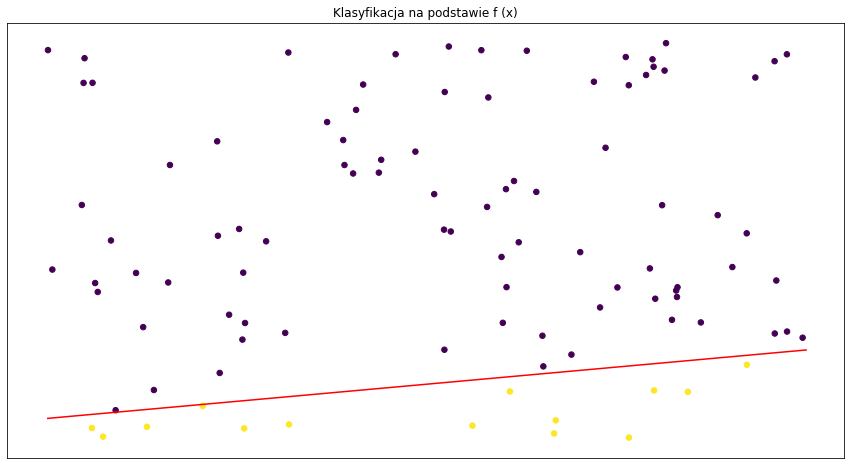

In [0]:
fig = plt.figure()
figa = plt.gca();
# Narysuk klasyfikator
plt.plot(x,f(x),'r')
# Klasyfikuj używając funkcji  f(x)
y_n = np.sign(f(x_n[:,0])-x_n[:,1])
colors = (y_n+1)/2.0;
plt.scatter(x_n[:,0],x_n[:,1],c=colors,s=30);
plt.title('Klasyfikacja na podstawie f (x)')
figa.axes.get_xaxis().set_visible(False)
figa.axes.get_yaxis().set_visible(False)

Nieźle, prawda? Algorytm powinien był zbliżyć się do dobrego przybliżenia linii oddzielającej. Jeśli nie, spróbuj ponownie uruchomić ostatni fragment kodu. Pamiętaj, że ta implementacja aktualizuje losowo wybrane punkty, więc w niektórych przypadkach 'poprawka' będzie gorsza.

Zwróć też uwagę, że linia oddzielająca punkty nie jest unikalna, biorąc pod uwagę zestaw danych, który mamy dostępny. Czy byłoby tak, gdybyśmy mieli wszystkie możliwe informacje? Domyślamy się, że to zależy od **danych**.


W każdym razie można udowodnić, że proces ten działa za każdym razem, biorąc pod uwagę wystarczającą liczbę kroków. Zakłada się, że dane można rozdzielić liniowo, co samo w sobie jest dość potężne. Może być dobry w znajdowaniu wzorców $\mathbb{R}^2$ ale co z $\mathbb{R}^d$? Czy istnieje sposób, aby pokazać, że zbiór punktów można oddzielić, „wstawiając” płaszczyzny między nimi? Przyjrzyjmy się temu dalej.

# Co się stanie, jeśli zestawu danych nie da się rozdzielić liniowo?

Jeśli danych nie da się oddzielić linią, w większości przypadków proces ten nie będzie działał idealnie. Niektóre punkty zostaną sklasyfikowane poprawnie, a niektóre nie. Następnie możemy pomyśleć o dwóch kolejnych pytaniach. 

1. Ile będzie nas to kosztowało, jeśli pominiemy punkt? Czy to dodatkowy e-mail ze spamem w naszej skrzynce odbiorczej, czy też pacjent nie otrzymuje właściwego leku?
2. Jeśli nie chcemy ryzykować linią, jaka jest najlepsza krzywa, której można użyć zamiast tego?

Nie odpowiemy na te pytania tutaj. Zamiast tego pokażę tylko przykład, w którym klasyfikacja może się nie powieść, jeśli punktów nie da się rozdzielić linią. 

Pamiętaj, że w naszym przypadku dany punkt $x=(x_1,x_2)$, klasyfikacja odbywa się zgodnie z $\text{sign}(f(x_1)-x_2)$, która może wynosić -1 lub 1.

In [0]:
# Zmień tę funkcję, aby wybrać punkty względem innej krzywej.
f = lambda x: x**2

In [0]:
x = np.linspace(0,1);

In [0]:
# Generowanie garstki punktów
N = 100
x_n = np.random.rand(N,2)

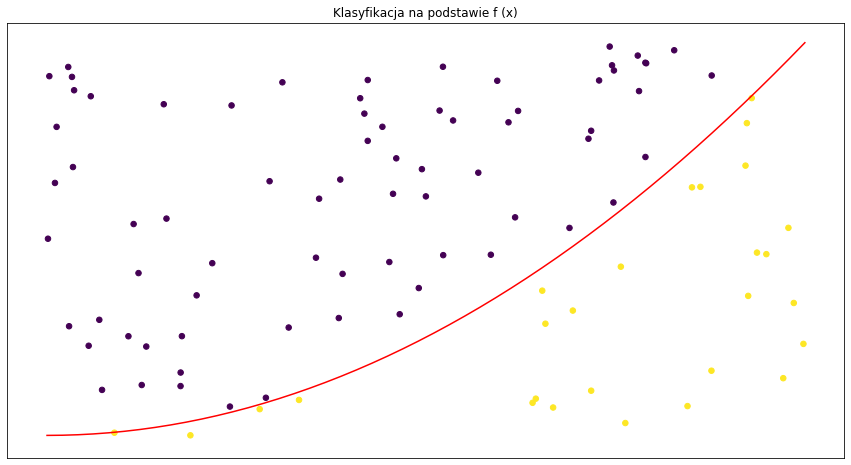

In [0]:
fig = plt.figure()
figa = plt.gca();
# Narysuj klasyfikator
plt.plot(x,f(x),'r')
# Klasyfikuj używając funkcji  f(x)
y_n = np.sign(f(x_n[:,0])-x_n[:,1])
colors = (y_n+1)/2.0;
plt.scatter(x_n[:,0],x_n[:,1],c=colors,s=30);
plt.title('Klasyfikacja na podstawie f (x)')
figa.axes.get_xaxis().set_visible(False)
figa.axes.get_yaxis().set_visible(False)

W tym przykładzie możemy to zobaczyć $x^2$ koloruje niektóre punkty jako czarne, a inne jako białe. Znajdźmy teraz liniowy separator.

In [0]:
# Spróbuj percepton z tymi danymi.
w = perceptron(x_n,y_n,MaxSteps=1000)

In [0]:
# Ponownie przeskaluj wagi, aby utworzyć nową reprezentację
b_new = -w[0]/w[2]
a_new = -w[1]/w[2]
y = lambda x: a_new * x + b_new;

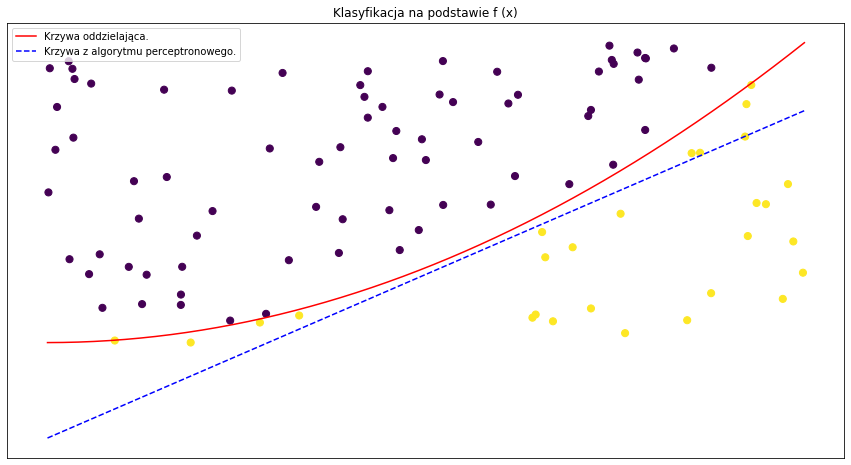

In [0]:
figa = plt.gca()
plt.scatter(x_n[:,0],x_n[:,1],c=colors,s=50);
plt.title('Klasyfikacja na podstawie f (x)')
plt.plot(x,f(x),'r',label='Krzywa oddzielająca.')
plt.plot(x,y(x),'b--',label = 'Krzywa z algorytmu perceptronowego.')
plt.legend()
figa.axes.get_xaxis().set_visible(False)
figa.axes.get_yaxis().set_visible(False)

W takim przypadku nasz klasyfikator nie może poprawnie uporządkować wszystkich przypadków (żółte punkty powinny znajdować się powyżej niebieskiej linii, czarne punkty poniżej). Ta sytuacja prawdopodobnie się pogorszy, gdy dodamy coraz więcej punktów.

# A to bardzo trudny przykład

In [0]:
# Zmień tę funkcję, aby wybrać punkty względem innej krzywej.
f = lambda x: np.abs( np.sin(x*(np.pi*2.)) )

In [0]:
x = np.linspace(0,1);

In [0]:
# Generowanie garstki punktów
N = 100
x_n = np.random.rand(N,2)

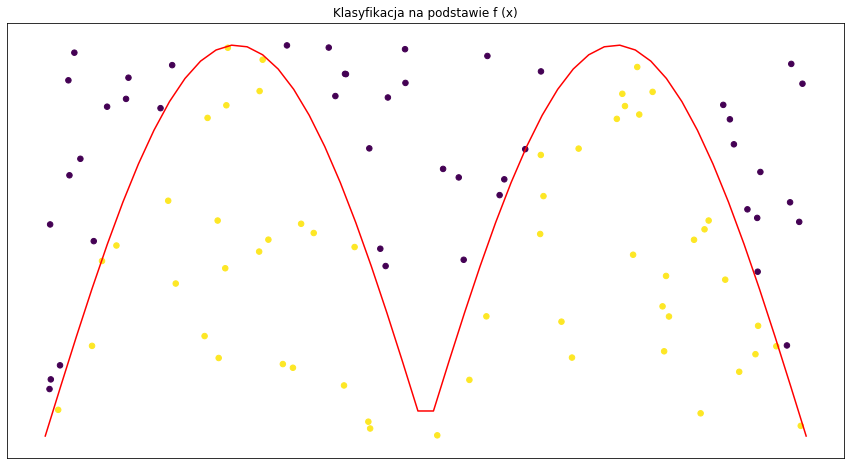

In [0]:
fig = plt.figure()
figa = plt.gca();
# Narysuj klasyfikator
plt.plot(x,f(x),'r')
# Klasyfikuj używając funkcji  f(x)
y_n = np.sign(f(x_n[:,0])-x_n[:,1])
colors = (y_n+1)/2.0;
plt.scatter(x_n[:,0],x_n[:,1],c=colors,s=30);
plt.title('Klasyfikacja na podstawie f (x)')
figa.axes.get_xaxis().set_visible(False)
figa.axes.get_yaxis().set_visible(False)

W tym przykładzie możemy to zobaczyć |sin($x$*2pi)|  koloruje niektóre punkty jako czarne, a inne jako żółte. Znajdźmy teraz liniowy separator.

In [0]:
# Spróbuj percepton z tymi danymi.
w = perceptron(x_n,y_n,MaxSteps=1000)

In [0]:
# Ponownie przeskaluj wagi, aby utworzyć nową reprezentację
b_new = -w[0]/w[2]
a_new = -w[1]/w[2]
y = lambda x: a_new * x + b_new;

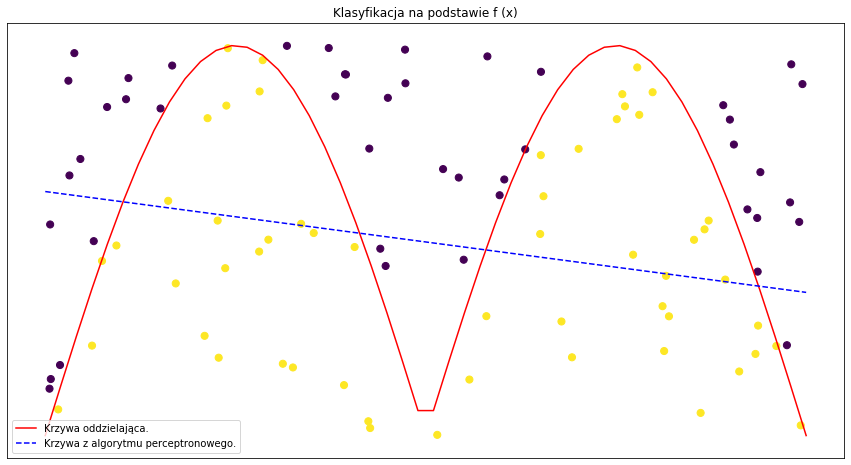

In [0]:
figa = plt.gca()
plt.scatter(x_n[:,0],x_n[:,1],c=colors,s=50);
plt.title('Klasyfikacja na podstawie f (x)')
plt.plot(x,f(x),'r',label='Krzywa oddzielająca.')
plt.plot(x,y(x),'b--',label = 'Krzywa z algorytmu perceptronowego.')
plt.legend()
figa.axes.get_xaxis().set_visible(False)
figa.axes.get_yaxis().set_visible(False)